In [32]:
from astral import LocationInfo
from astral.sun import elevation
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz


In [33]:
TRONDELAG = LocationInfo(
    name="Trøndelag",
    region="Norway",
    timezone="Europe/Oslo",
    latitude=63.4,
    longitude=10.4,
    )

In [34]:
date = datetime.now(pytz.utc).date()
#date_string = '2025-12-21'
#format_pattern = '%Y-%m-%d'
#date = datetime.strptime(date_string, format_pattern)

In [35]:
times = [datetime.combine(date, datetime.min.time()) + timedelta(minutes=i*10) for i in range(144)]
times = [t.replace(tzinfo=pytz.utc) for t in times]

In [36]:
# 3. Calculate elevation for each time
elevations = [elevation(TRONDELAG.observer, t) for t in times]

In [37]:
max(elevations)

10.841857129188128

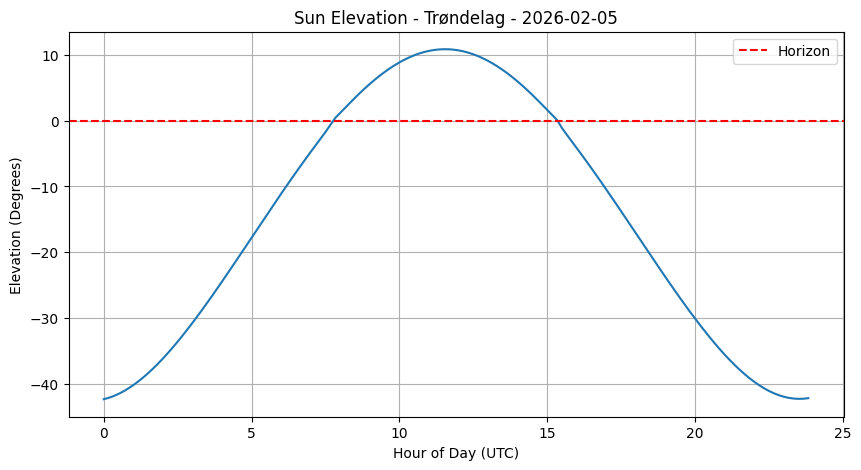

In [38]:
# 4. Plot
plt.figure(figsize=(10, 5))
plt.plot([t.hour + t.minute/60 for t in times], elevations)
plt.axhline(0, color='red', linestyle='--', label='Horizon')
plt.title(f"Sun Elevation - {TRONDELAG.name} - {date}")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Elevation (Degrees)")
plt.grid(True)
plt.legend()
plt.show()